HSV can be used to facilitate segmentaion processes

Usally, objects in image have distinct colors(hues) and luminosites, so that these features can be used to seperate different area of the image

In RGB, hue and luminosity are expressed as a linear combination of R,G,B channels, Whereas they corresponf to single channels of the HSV

A simple segmentation of the image can then be effectively performed by a mere theresholding of the HSV channels

In [10]:
from skimage import data
from skimage import io
from skimage.color import rgb2hsv
import matplotlib.pyplot as plt

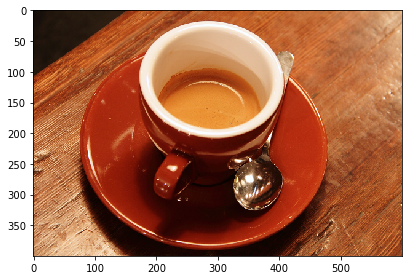

In [5]:
img = data.coffee()
io.imshow(img)

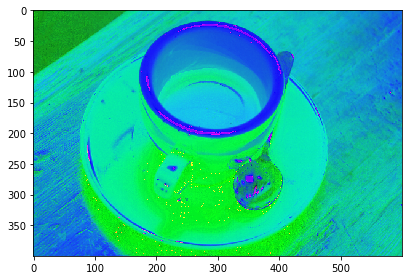

In [12]:
hsv_img = rgb2hsv(img)
io.imshow(hsv_img)

In [7]:
hue_img = hsv_img[:, :, 0]
value_img = hsv_img[:, :, 2]

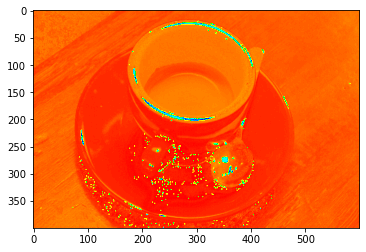

In [16]:
plt.imshow(hue_img, cmap='hsv')

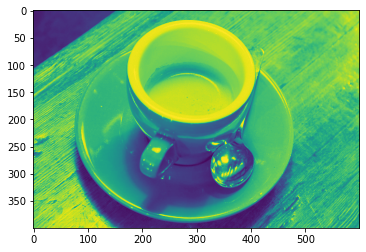

In [14]:
plt.imshow(value_img)

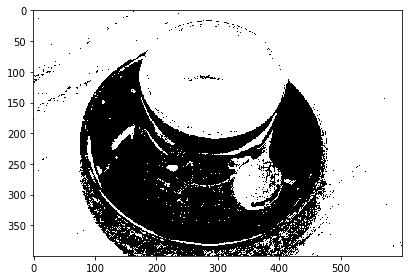

In [17]:
# we set a threshold on the Hue channel to separate the cup from the background
hue_threshold = 0.04
binary_img = hue_img > hue_threshold
io.imshow(binary_img)

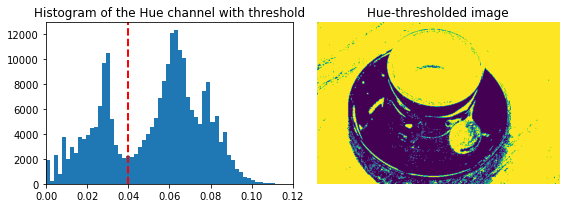

In [20]:
fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(8, 3))

ax0.hist(hue_img.ravel(), 512)
ax0.set_title("Histogram of the Hue channel with threshold")
ax0.axvline(x=hue_threshold, color='r', linestyle='dashed', linewidth=2)
ax0.set_xbound(0, 0.12)
ax1.imshow(binary_img)
ax1.set_title("Hue-thresholded image")
ax1.axis('off')

fig.tight_layout()

In [21]:
# perform an additional thresholding on the Value channel to partly remove the shadow of the cup
value_threshold = 0.10
binary_img = (hue_img > hue_threshold) | (value_img < value_threshold)

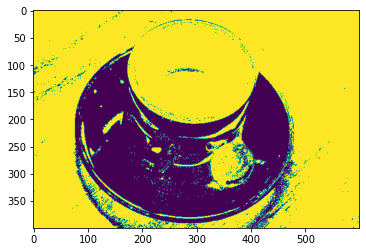

In [22]:
plt.imshow(binary_img)